# Introduction to Deep Learning with PyTorch
----

Course link: https://app.datacamp.com/learn/courses/introduction-to-deep-learning-with-pytorch

### Installing necessary libraries

In [1]:
# %pip install torch numpy pandas matplotlib

![neural-network-overview](images/neural-network-overview.png)

![venn-diagram-ai-ml-deeplearning](images/venn-diagram-ai-ml-deeplearning.png)

# Torch code snippets

In [2]:
import torch

## Tensor Attributes

### 1. Tensor Shape

In [3]:
Lst = [[1, 2, 3], [4, 5, 6]]
tensor = torch.tensor(Lst)
tensor.shape

torch.Size([2, 3])

### 2. Tensor Data Type

In [4]:
tensor.dtype

torch.int64

### 3. Tensor Device

In [5]:
tensor.device

device(type='cpu')

## Creating our own Neural Network
----
![creating-neural-network-1](images/creating-neural-network-1.png)

In [6]:
import torch.nn as nn

In [7]:
# Create input_tensor with three features
input_tensor = torch.tensor(
    [[0.342, 0.543, -0.4533]]
)

A linear layer takes an input, applied a linear function, and returns output.

What happens in a linear layer is 'For input 'X', weights 'W0' and bias 'b0', the linear layer performs

y0 = W0*X + b0

In PyTorch: Output = W0 @ input + b0

So when we call the nn.linear function below, it calls the Weights and Biases randomly so they are not yet useful. But we tune them in models so the output is meaningful.

In [8]:
# Define our first linear layer. in_features is the number of input layers and out_features is the number of output layers. Look at the image under 'Creating our own Neural Network'.
linear_layer = nn.Linear(in_features=3, out_features=2)

In [9]:
# Pass input through linear layer
output = linear_layer(input_tensor)

output

tensor([[-0.6133, -0.7813]], grad_fn=<AddmmBackward0>)

### Getting to know the linear layer operation

- Each linear layer has a .weight and .bias
- Each linear layer multiples its respective input with layer weights and adds biases
- Even with multiple stacked linear layers, output still has linear relationship with input.

In [10]:
linear_layer.weight

Parameter containing:
tensor([[-0.4669, -0.1107,  0.1960],
        [-0.5313, -0.5657,  0.0991]], requires_grad=True)

In [11]:
linear_layer.bias

Parameter containing:
tensor([-0.3047, -0.2475], requires_grad=True)

### Lets visualize the Linear_layers with their weights and biases

/var/folders/ns/jv7pb5cs01nc0m_8788fhd680000gn/T/ipykernel_1937/4206505998.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


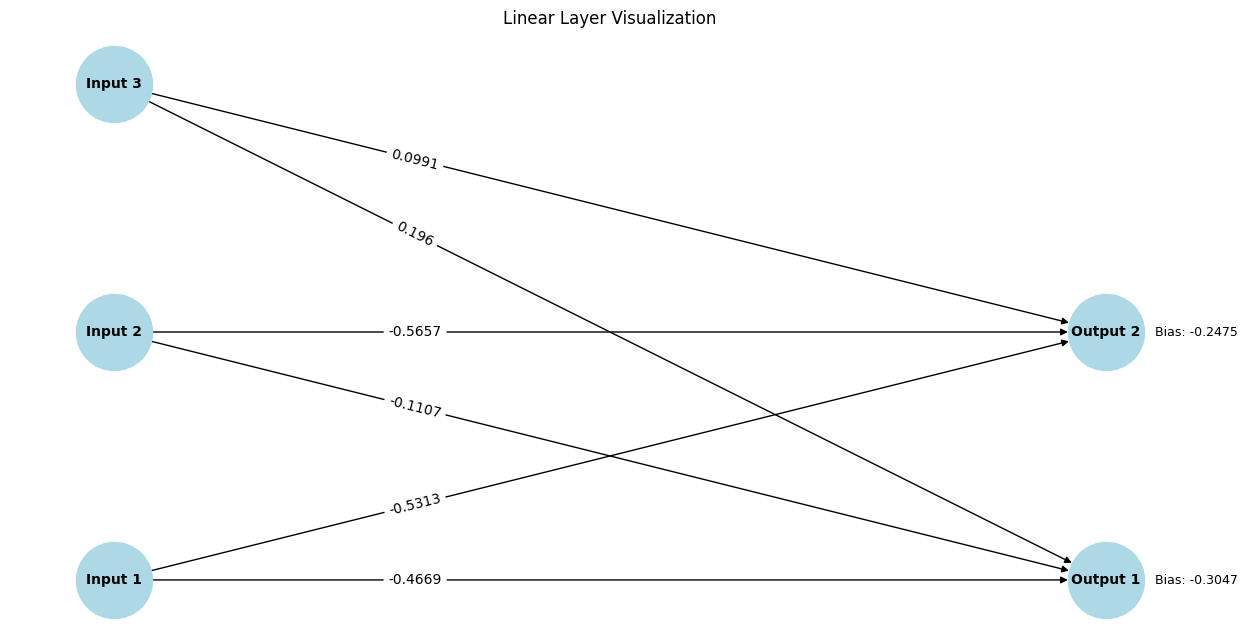

Output tensor:
tensor([[-0.6133, -0.7813]], grad_fn=<AddmmBackward0>)


In [12]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_linear_layer(linear_layer, input_tensor, output_tensor):
    # Create a directed graph
    G = nx.DiGraph()

    # Add input nodes
    for i in range(input_tensor.shape[1]):
        G.add_node(f"Input {i+1}", pos=(0, i))

    # Add output nodes
    for i in range(output_tensor.shape[1]):
        G.add_node(f"Output {i+1}", pos=(2, i))

    # Add edges with weights
    for i in range(input_tensor.shape[1]):
        for j in range(output_tensor.shape[1]):
            weight = linear_layer.weight[j, i].item()
            G.add_edge(f"Input {i+1}", f"Output {j+1}", weight=round(weight, 4))

    # Set up the plot
    plt.figure(figsize=(12, 6))
    pos = nx.get_node_attributes(G, 'pos')

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=3000, font_size=10, font_weight='bold')

    # Add edge labels (weights) with adjusted positions
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3)

    # Add bias labels
    for i, bias in enumerate(linear_layer.bias):
        plt.text(2.1, i, f'Bias: {bias.item():.4f}', 
                 fontsize=9, verticalalignment='center')

    plt.title("Linear Layer Visualization")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the linear layer
visualize_linear_layer(linear_layer, input_tensor, output)

# Print the output tensor
print("Output tensor:")
print(output)

Networks with only linear layers are called **fully connected layers**. Each neuron in one layer is connected to each neuron in the next layer.

# Each **nn.Linear** line of code is a Linear Layer

Here is a visual

![neural-network-linear-layers](images/neural-network-linear-layers.png)

## Stacking layers with nn.Sequential()
- A PyTorch container that allows us to stack multiple neural network modules in sequence.

In [13]:
# Create network with three linear layers
model = nn.Sequential(
    nn.Linear (10, 18),
    nn.Linear (18, 20),
    nn.Linear (20, 5)
)
model

Sequential(
  (0): Linear(in_features=10, out_features=18, bias=True)
  (1): Linear(in_features=18, out_features=20, bias=True)
  (2): Linear(in_features=20, out_features=5, bias=True)
)

In [14]:
# Create input_tensor with ten features
input_tensor_2 = torch.tensor(
    [[0.342, 0.543, -0.4533, 0.434, -0.3435, 0.3523, -0.3424, 0.3453, 0.87509, -0.3425]]
)

print('This is a 1x10 dimentions tensor', input_tensor_2)

This is a 1x10 dimentions tensor tensor([[ 0.3420,  0.5430, -0.4533,  0.4340, -0.3435,  0.3523, -0.3424,  0.3453,
          0.8751, -0.3425]])


In [15]:
output_tensor = model(input_tensor_2)
print('here we received an output of 1x5 dimensions', output_tensor)

here we received an output of 1x5 dimensions tensor([[-0.0864, -0.0102, -0.0335,  0.0013, -0.1860]],
       grad_fn=<AddmmBackward0>)


## Exercise #1

### Your first neural network
In this exercise, you will implement a small neural network containing two linear layers. The first layer takes an eight-dimensional input, and the last layer outputs a one-dimensional tensor.

The torch package and the torch.nn package have already been imported for you.

Create a neural network of two linear layers that takes a tensor of dimensions 1x8 as input, representing 8 features, and outputs a tensor of dimensions 1x1
Use any output dimension for the first layer you want.

In [16]:
import torch
import torch.nn as nn

input_tensor = torch.Tensor([[2, 3, 6, 7, 9, 3, 2, 1]])

# Implement a small neural network with exactly two linear layers
model = nn.Sequential(
    nn.Linear(8, 4),  # First linear layer with an intermediate output dimension
    nn.Linear(4, 1)   # Second linear layer to produce the final output
)

output = model(input_tensor)
print(output)

tensor([[-1.6386]], grad_fn=<AddmmBackward0>)


### Stacking linear layers
Nice work building your first network with two linear layers. Let's stack some more layers. Remember that a neural network can have as many hidden layers as we want, provided the inputs and outputs line up.

The aim of this exercise is for you to become comfortable thinking about the inputs and outputs of each successive layer in a PyTorch neural network.

This network is designed to ingest the following input:

`
input_tensor = torch.Tensor([[2, 3, 6, 7, 9, 3, 2, 1, 5, 3, 6, 9]])
`

- Instructions: Reorder the items provided to create a neural network with three hidden layers and an output of size 2.

In [17]:
# Explanation for the code below:
# 1. It takes an input tensor with 12 elements, as specified in the question.
# 2. It has three hidden layers:
#    - The first layer transforms from 12 to 20 dimensions
#    - The second layer transforms from 20 to 14 dimensions
#    - The third layer transforms from 14 to 3 dimensions
# 3. The final layer outputs a tensor of size 2, as required.

# The nn.Sequential module is used to stack these layers in order. Each nn.Linear layer performs a linear transformation on its input.
# The dimensions of each layer are chosen arbitrarily, but ensure that the output of one layer matches the input of the next.
# This structure allows the network to learn increasingly complex representations of the input data as it passes through each layer.

input_tensor = torch.Tensor([[2, 3, 6, 7, 9, 3, 2, 1, 5, 3, 6, 9]])

model = nn.Sequential(
    nn.Linear(12, 20),  # First hidden layer
    nn.Linear(20, 14),   # Second hidden layer
    nn.Linear(14, 3),    # Third hidden layer
    nn.Linear(3, 2)     # Fourth the output layer
)

output = model(input_tensor)
print(output)

tensor([[0.8962, 1.8579]], grad_fn=<AddmmBackward0>)


## There are multiple types of Layers
1. 

### Why do we need activation functions?

